In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install matplotlib


[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install tensorflow.keras

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow.keras (from versions: none)
ERROR: No matching distribution found for tensorflow.keras

[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install IPython

In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
# from IPython.display import HTML


In [6]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 50

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "leaf_dataset",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 5904 files belonging to 50 classes.


In [8]:
class_names = dataset.class_names
class_names

['Alpinia Galanga (Rasna)',
 'Amaranthus Viridis (Arive-Dantu)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Azadirachta Indica (Neem)',
 'Basella Alba (Basale)',
 'Brassica Juncea (Indian Mustard)',
 'Carissa Carandas (Karanda)',
 'Citrus Limon (Lemon)',
 'Ficus Auriculata (Roxburgh fig)',
 'Ficus Religiosa (Peepal Tree)',
 'Hibiscus Rosa-sinensis',
 'Jasminum (Jasmine)',
 'Mangifera Indica (Mango)',
 'Mentha (Mint)',
 'Moringa Oleifera (Drumstick)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Murraya Koenigii (Curry)',
 'Nerium Oleander (Oleander)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Piper Betle (Betel)',
 'Plectranthus Amboinicus (Mexican Mint)',
 'Pongamia Pinnata (Indian Beech)',
 'Psidium Guajava (Guava)',
 'Punica Granatum (Pomegranate)',
 'Santalum Album (Sandalwood)',
 'Syzygium Cumini (Jamun)',
 'Syzygium Jambos (Rose Apple)',
 'Tabernaemontana Divaricata (Crape Jasmine)',
 'Trigonella Foenum-graecum (Fenugreek)',
 'arjun_diseased',

In [9]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[16 49 35 48 36 37 49  6 18 36  9 44 38 21 31 36 43 38 46 42 48 38 35 19
 31 32 38 25 44 24 21 41]


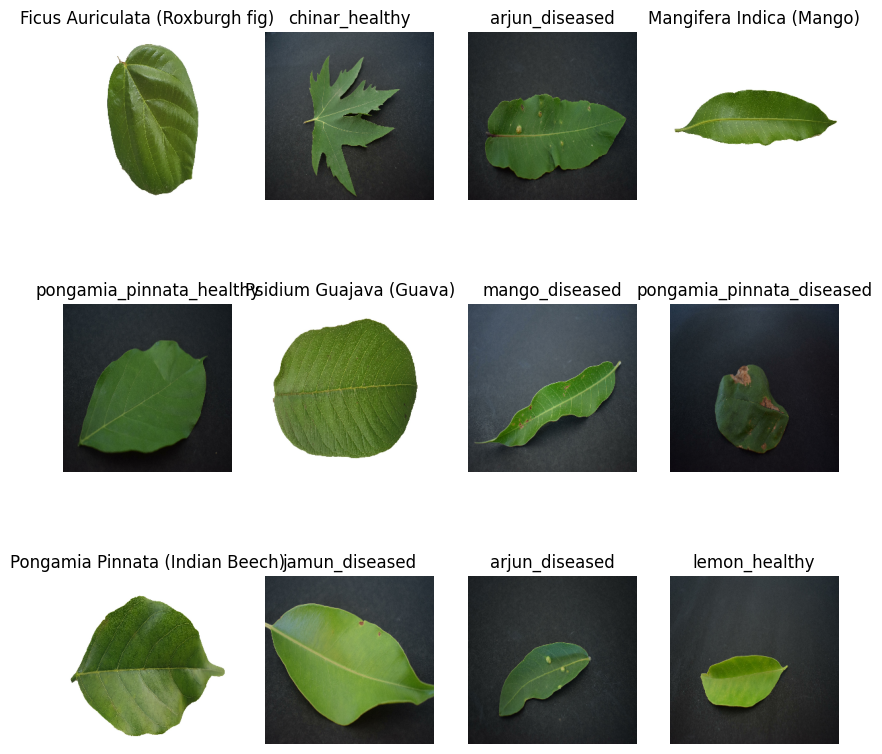

In [10]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [18]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [19]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [22]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [23]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [24]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 50

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (32, 60, 60, 64)         

In [25]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [18]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=70,
)

Epoch 1/50


148/148 [==============================] - 284s 1s/step - loss: 3.4166 - accuracy: 0.0975 - val_loss: 2.6988 - val_accuracy: 0.2170
Epoch 2/50
148/148 [==============================] - 156s 1s/step - loss: 2.4004 - accuracy: 0.2536 - val_loss: 2.1202 - val_accuracy: 0.3229
Epoch 3/50
148/148 [==============================] - 147s 988ms/step - loss: 1.9958 - accuracy: 0.3564 - val_loss: 1.8272 - val_accuracy: 0.4583
Epoch 4/50
148/148 [==============================] - 149s 1s/step - loss: 1.7264 - accuracy: 0.4396 - val_loss: 1.5576 - val_accuracy: 0.4861
Epoch 5/50
148/148 [==============================] - 150s 1s/step - loss: 1.5238 - accuracy: 0.5032 - val_loss: 1.6222 - val_accuracy: 0.5052
Epoch 6/50
148/148 [==============================] - 159s 1s/step - loss: 1.4049 - accuracy: 0.5428 - val_loss: 1.4260 - val_accuracy: 0.5382
Epoch 7/50
148/148 [==============================] - 151s 1s/step - loss: 1.3113 - accuracy: 0.5718 - val_loss: 1.4010 - val_accuracy: 0

In [26]:
scores = model.evaluate(test_ds)



19/19 [==============================] - 87s 415ms/step - loss: 3.9093 - accuracy: 0.0099


first image to predict
actual label: guava_healthy
1/1 [==============================] - 1s 1s/step
predicted label: Azadirachta Indica (Neem)


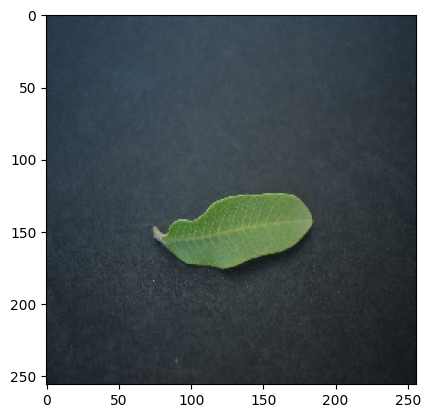

In [27]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [28]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 52ms/step


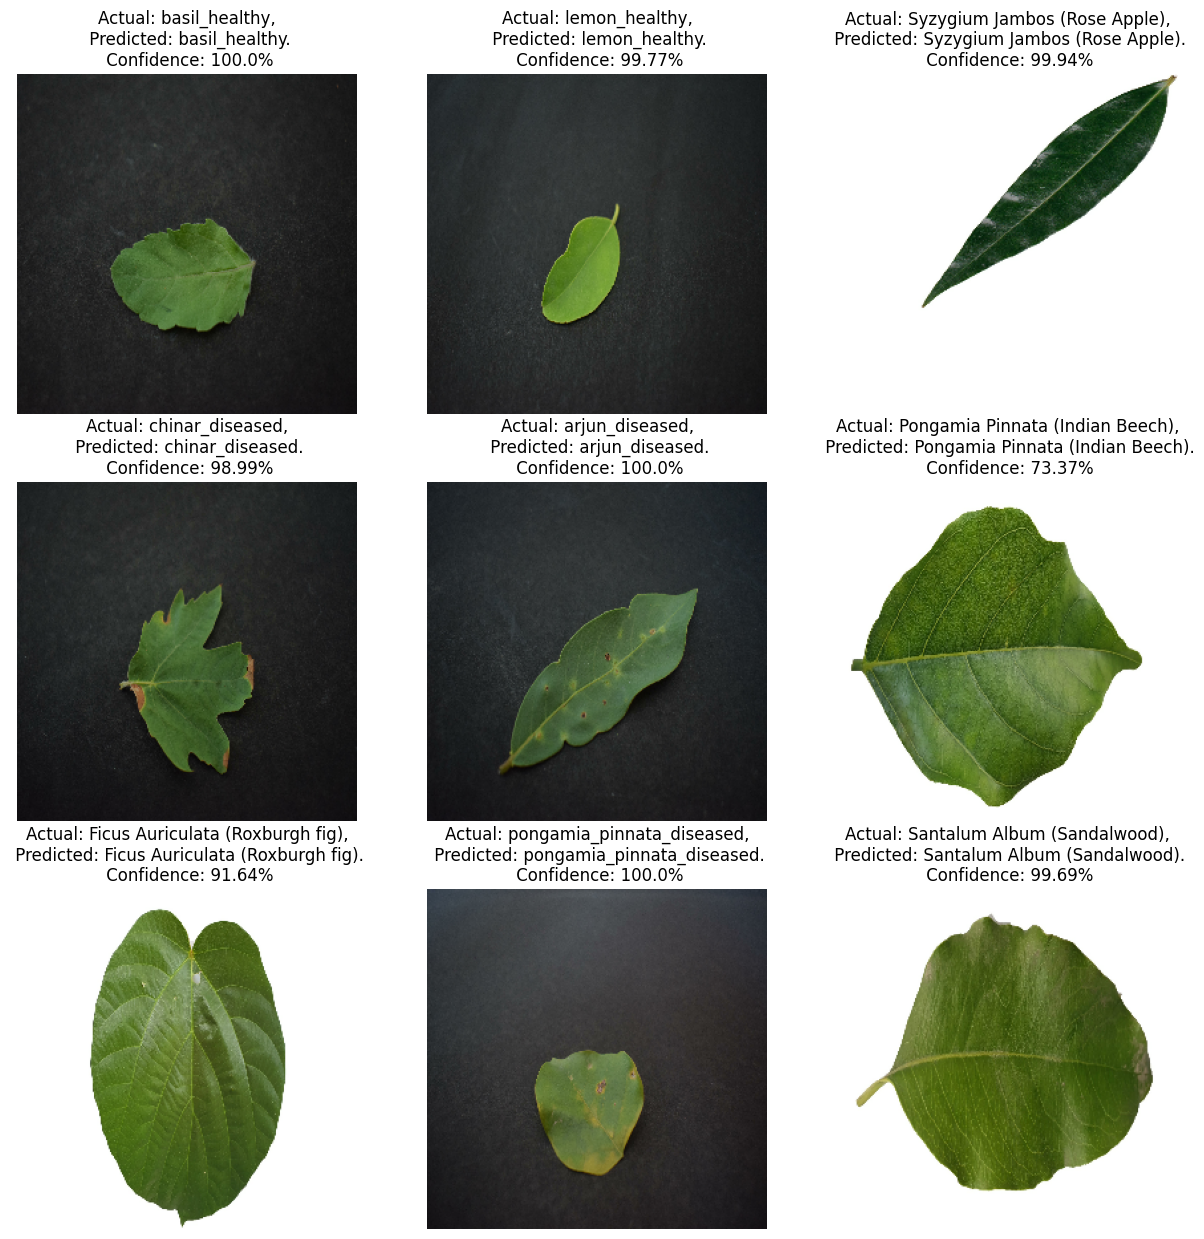

In [22]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

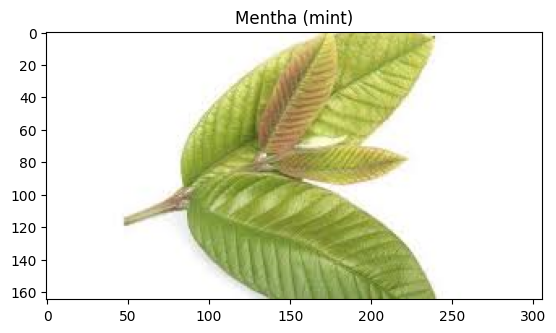

1/1 [==============================] - 0s 72ms/step
Alpinia Galanga (Rasna): 2.0000% probability
Amaranthus Viridis (Arive-Dantu): 2.0002% probability
Artocarpus Heterophyllus (Jackfruit): 2.0003% probability
Azadirachta Indica (Neem): 2.0007% probability
Basella Alba (Basale): 2.0001% probability
Brassica Juncea (Indian Mustard): 1.9997% probability
Carissa Carandas (Karanda): 1.9998% probability
Citrus Limon (Lemon): 2.0002% probability
Ficus Auriculata (Roxburgh fig): 2.0000% probability
Ficus Religiosa (Peepal Tree): 2.0005% probability
Hibiscus Rosa-sinensis: 2.0001% probability
Jasminum (Jasmine): 1.9996% probability
Mangifera Indica (Mango): 1.9999% probability
Mentha (Mint): 1.9997% probability
Moringa Oleifera (Drumstick): 1.9997% probability
Muntingia Calabura (Jamaica Cherry-Gasagase): 2.0005% probability
Murraya Koenigii (Curry): 2.0006% probability
Nerium Oleander (Oleander): 1.9999% probability
Nyctanthes Arbor-tristis (Parijata): 1.9996% probability
Ocimum Tenuiflorum (T

In [30]:
from tensorflow import keras
import matplotlib.pyplot as plt

input_image_path = "guava_healthy.jpeg"
input_image = plt.imread(input_image_path)

# Display the input image
plt.imshow(input_image)
plt.title("Mentha (mint)")
plt.show()

# Preprocess the input image (resize, rescale, etc.) to match the model's input requirements
input_image = keras.preprocessing.image.smart_resize(input_image, (IMAGE_SIZE, IMAGE_SIZE))
input_image = input_image / 255.0  # Normalize pixel values to the range [0, 1]

# Expand dimensions to create a batch of size 1
input_image = np.expand_dims(input_image, axis=0)

# # Make predictions
predictions = model.predict(input_image)

for i, label_prob in enumerate(predictions[0]):
    class_name = class_names[i]
    print(f"{class_name}: {label_prob * 100:.4f}% probability")

# Print the predicted label
print("Predicted Label:", class_names[np.argmax(predictions[0])])


In [ ]:
import os
model_version=max([int(i) for i in os.listdir("./models") + [0]])+1
model.save(f"./models/{model_version}")

In [ ]:
model.save("./leaf_identification.h5")